## 📚 Apa itu Advanced Data Storytelling?

**Advanced Data Storytelling** menggabungkan:
- **Complex Analysis**: Multi-dimensional data exploration
- **Business Context**: Real-world business problems
- **Narrative Arc**: Beginning → Conflict → Resolution → Action
- **Persuasion**: Data-driven recommendations
- **Audience Awareness**: Tailored untuk decision-makers

### Perbedaan Basic vs Advanced Storytelling:

| Aspek | Basic Storytelling | Advanced Storytelling |
|-------|-------------------|----------------------|
| **Data Complexity** | Single dimension | Multi-dimensional, relational |
| **Analysis** | Descriptive | Prescriptive & predictive |
| **Audience** | General | Executive/stakeholder-specific |
| **Outcome** | Information | Decision & action |
| **Narrative** | Linear | Multi-layered dengan subplots |
| **Metrics** | Standard KPIs | Custom business metrics |

### Framework: STAR Method

**S**ituation - **T**ask - **A**ction - **R**esult

1. **Situation**: Set context, define problem
2. **Task**: What needs to be addressed
3. **Action**: Data analysis & insights
4. **Result**: Recommendations & next steps

---

In [1]:
# Setup Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Styling configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("✅ Advanced Storytelling Environment Ready!")
print(f"📦 Pandas: {pd.__version__}")
print(f"📦 NumPy: {np.__version__}")
print(f"📦 Matplotlib: {plt.matplotlib.__version__}")
print(f"📦 Seaborn: {sns.__version__}")

✅ Advanced Storytelling Environment Ready!
📦 Pandas: 2.1.3
📦 NumPy: 1.26.4
📦 Matplotlib: 3.10.7
📦 Seaborn: 0.13.2


## 1. Case Study: UK Online Retail Analysis

### 🎬 SITUATION (Background)

**Company**: UK-based Online Retailer (Real Dataset from UCI)  
**Dataset**: Online Retail II - Real transactions 2009-2011  
**Size**: 500,000+ transactions, 4,000+ customers  
**Problem**: Understanding customer behavior & revenue patterns  
**Stakeholders**: CEO, CMO, Sales Director  

### 🎯 TASK (Objective)

Analyze real e-commerce data untuk:
1. Understand sales patterns and trends
2. Identify customer segments  
3. Calculate retention (Cohort Analysis)
4. Perform RFM segmentation
5. Provide data-driven recommendations

### 📦 Dataset Source

[UCI Machine Learning Repository - Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II)

**Columns:**
- InvoiceNo, StockCode, Description
- Quantity, UnitPrice, InvoiceDate
- CustomerID, Country

Mari kita load real dataset:


In [2]:
# Load Real E-Commerce Dataset from UCI Repository
print("📥 Loading Online Retail Dataset from UCI...")
print("This may take a moment...\\n")

# Dataset URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'

try:
    # Load dataset (Year 2009-2010 sheet)
    df_raw = pd.read_excel(url, sheet_name='Year 2009-2010')
    print("✅ Dataset loaded from UCI!")
    
    # Ensure InvoiceDate is datetime
    if not pd.api.types.is_datetime64_any_dtype(df_raw['InvoiceDate']):
        df_raw['InvoiceDate'] = pd.to_datetime(df_raw['InvoiceDate'], errors='coerce')
    
except Exception as e:
    print(f"⚠️ Could not load from UCI: {e}")
    print("Creating sample data for demonstration...\\n")
    
    # Fallback: create sample data
    np.random.seed(42)
    dates = pd.date_range('2009-12-01', '2010-12-09', freq='H')
    n = 50000
    
    df_raw = pd.DataFrame({
        'InvoiceNo': [f'{100000+i}' for i in range(n)],
        'StockCode': np.random.choice(['85123A', '71053', '84406B'], n),
        'Description': np.random.choice(['WHITE HEART T-LIGHT', 
                                         'METAL LANTERN', 'COAT HANGER'], n),
        'Quantity': np.random.randint(1, 50, n),
        'InvoiceDate': np.random.choice(dates, n),
        'UnitPrice': np.random.uniform(0.5, 50, n),
        'CustomerID': np.random.choice(range(12000, 18000), n),
        'Country': np.random.choice(['United Kingdom', 'Germany', 'France'], n,
                                   p=[0.9, 0.05, 0.05])
    })
    print("✅ Sample data created!")

print(f"\\n📊 Dataset Overview:")
print(f"{'='*60}")
print(f"Records: {len(df_raw):,}")
print(f"Columns: {list(df_raw.columns)}")

# Normalize column names (remove spaces, standardize)
df_raw.columns = df_raw.columns.str.strip()

# Safe display of date range and customer info
try:
    print(f"Date Range: {df_raw['InvoiceDate'].min()} to {df_raw['InvoiceDate'].max()}")
except:
    print(f"Date Range: Unable to display")

# Check for CustomerID or Customer ID column (UCI dataset uses 'Customer ID' with space)
customer_col = None
for col in ['CustomerID', 'Customer ID']:
    if col in df_raw.columns:
        customer_col = col
        break

if customer_col:
    try:
        valid_customers = df_raw[customer_col].dropna().nunique()
        print(f"Unique Customers: {valid_customers:,}")
    except:
        print(f"Unique Customers: Unable to calculate")
else:
    print(f"Unique Customers: CustomerID column not found")

print(f"Unique Products: {df_raw['StockCode'].nunique():,}")
print(f"\\n📦 Sample:")
print(df_raw.head(10))


📥 Loading Online Retail Dataset from UCI...
This may take a moment...\n
⚠️ Could not load from UCI: File is not a zip file
Creating sample data for demonstration...\n
✅ Sample data created!
\n📊 Dataset Overview:
Records: 50,000
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Date Range: 2009-12-01 00:00:00 to 2010-12-09 00:00:00
Unique Customers: 5,999
Unique Products: 3
\n📦 Sample:
  InvoiceNo StockCode          Description  Quantity         InvoiceDate  \
0    100000    84406B  WHITE HEART T-LIGHT        22 2010-02-26 22:00:00   
1    100001    85123A          COAT HANGER        49 2009-12-05 16:00:00   
2    100002    84406B        METAL LANTERN        15 2010-01-13 22:00:00   
3    100003    84406B          COAT HANGER        40 2010-10-07 21:00:00   
4    100004    85123A  WHITE HEART T-LIGHT        42 2010-04-29 00:00:00   
5    100005    85123A        METAL LANTERN        15 2010-08-29 14:00:00   
6    100006   

## 2. Data Cleaning & Preparation

Real-world data is messy! Mari kita clean dan prepare data untuk analysis:


In [3]:
# Data Cleaning Steps
print("🧹 Starting Data Cleaning...")
print(f"Initial records: {len(df_raw):,}\n")

# 0. Standardize column names (UCI dataset uses 'Customer ID' with space)
if 'Customer ID' in df_raw.columns:
    df_raw = df_raw.rename(columns={'Customer ID': 'CustomerID'})
    print("✅ Standardized column names")

# 1. Remove rows with missing CustomerID (can't do cohort/RFM without it)
df_clean = df_raw.dropna(subset=['CustomerID'])
print(f"✅ Removed {len(df_raw) - len(df_clean):,} rows with missing CustomerID")

# 2. Remove cancelled orders (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
print(f"✅ Removed cancelled orders")

# 3. Remove negative quantities and prices (returns/errors)
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"✅ Removed negative quantities/prices")

# 4. Calculate Revenue
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 5. Convert CustomerID to integer
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

# 6. Extract date features
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Month_Name'] = df_clean['InvoiceDate'].dt.strftime('%b')
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# 7. Focus on UK customers only (largest market)
df_ecommerce = df_clean[df_clean['Country'] == 'United Kingdom'].copy()
print(f"✅ Filtered to UK customers only")

# 8. Remove extreme outliers (orders > $10,000 might be bulk/B2B)
q99 = df_ecommerce['Revenue'].quantile(0.99)
df_ecommerce = df_ecommerce[df_ecommerce['Revenue'] <= q99]
print(f"✅ Removed extreme outliers (>99th percentile)")

print(f"\n{'='*60}")
print(f"📊 CLEANED DATASET SUMMARY")
print(f"{'='*60}")
print(f"Final records: {len(df_ecommerce):,}")
print(f"Date Range: {df_ecommerce['InvoiceDate'].min()} to {df_ecommerce['InvoiceDate'].max()}")
print(f"Unique Customers: {df_ecommerce['CustomerID'].nunique():,}")
print(f"Unique Products: {df_ecommerce['StockCode'].nunique():,}")
print(f"Total Revenue: £{df_ecommerce['Revenue'].sum():,.2f}")
print(f"Average Order Value: £{df_ecommerce['Revenue'].mean():.2f}")

print(f"\n📦 Sample Data:")
print(df_ecommerce[['InvoiceNo', 'Description', 'Quantity', 'UnitPrice', 
                     'Revenue', 'InvoiceDate', 'CustomerID']].head(10))

print(f"\n📈 Data Quality Check:")
print(f"Missing values:\n{df_ecommerce.isnull().sum()}")


🧹 Starting Data Cleaning...
Initial records: 50,000

✅ Removed 0 rows with missing CustomerID
✅ Removed cancelled orders
✅ Removed negative quantities/prices
✅ Filtered to UK customers only
✅ Removed extreme outliers (>99th percentile)

📊 CLEANED DATASET SUMMARY
Final records: 44,491
Date Range: 2009-12-01 00:00:00 to 2010-12-09 00:00:00
Unique Customers: 5,993
Unique Products: 3
Total Revenue: £27,572,621.02
Average Order Value: £619.73

📦 Sample Data:
   InvoiceNo          Description  Quantity  UnitPrice      Revenue  \
0     100000  WHITE HEART T-LIGHT        22  44.940299   988.686586   
1     100001          COAT HANGER        49   3.112068   152.491331   
2     100002        METAL LANTERN        15  45.101936   676.529045   
4     100004  WHITE HEART T-LIGHT        42  30.525749  1282.081478   
5     100005        METAL LANTERN        15   4.521808    67.827119   
7     100007  WHITE HEART T-LIGHT        31  46.569027  1443.639848   
8     100008  WHITE HEART T-LIGHT        39  

## 3. ACTION: Monthly Revenue Trend Analysis

### 📊 Step 1: Explore Revenue Patterns

Mari kita analyze monthly revenue trends dari real UK retail data:


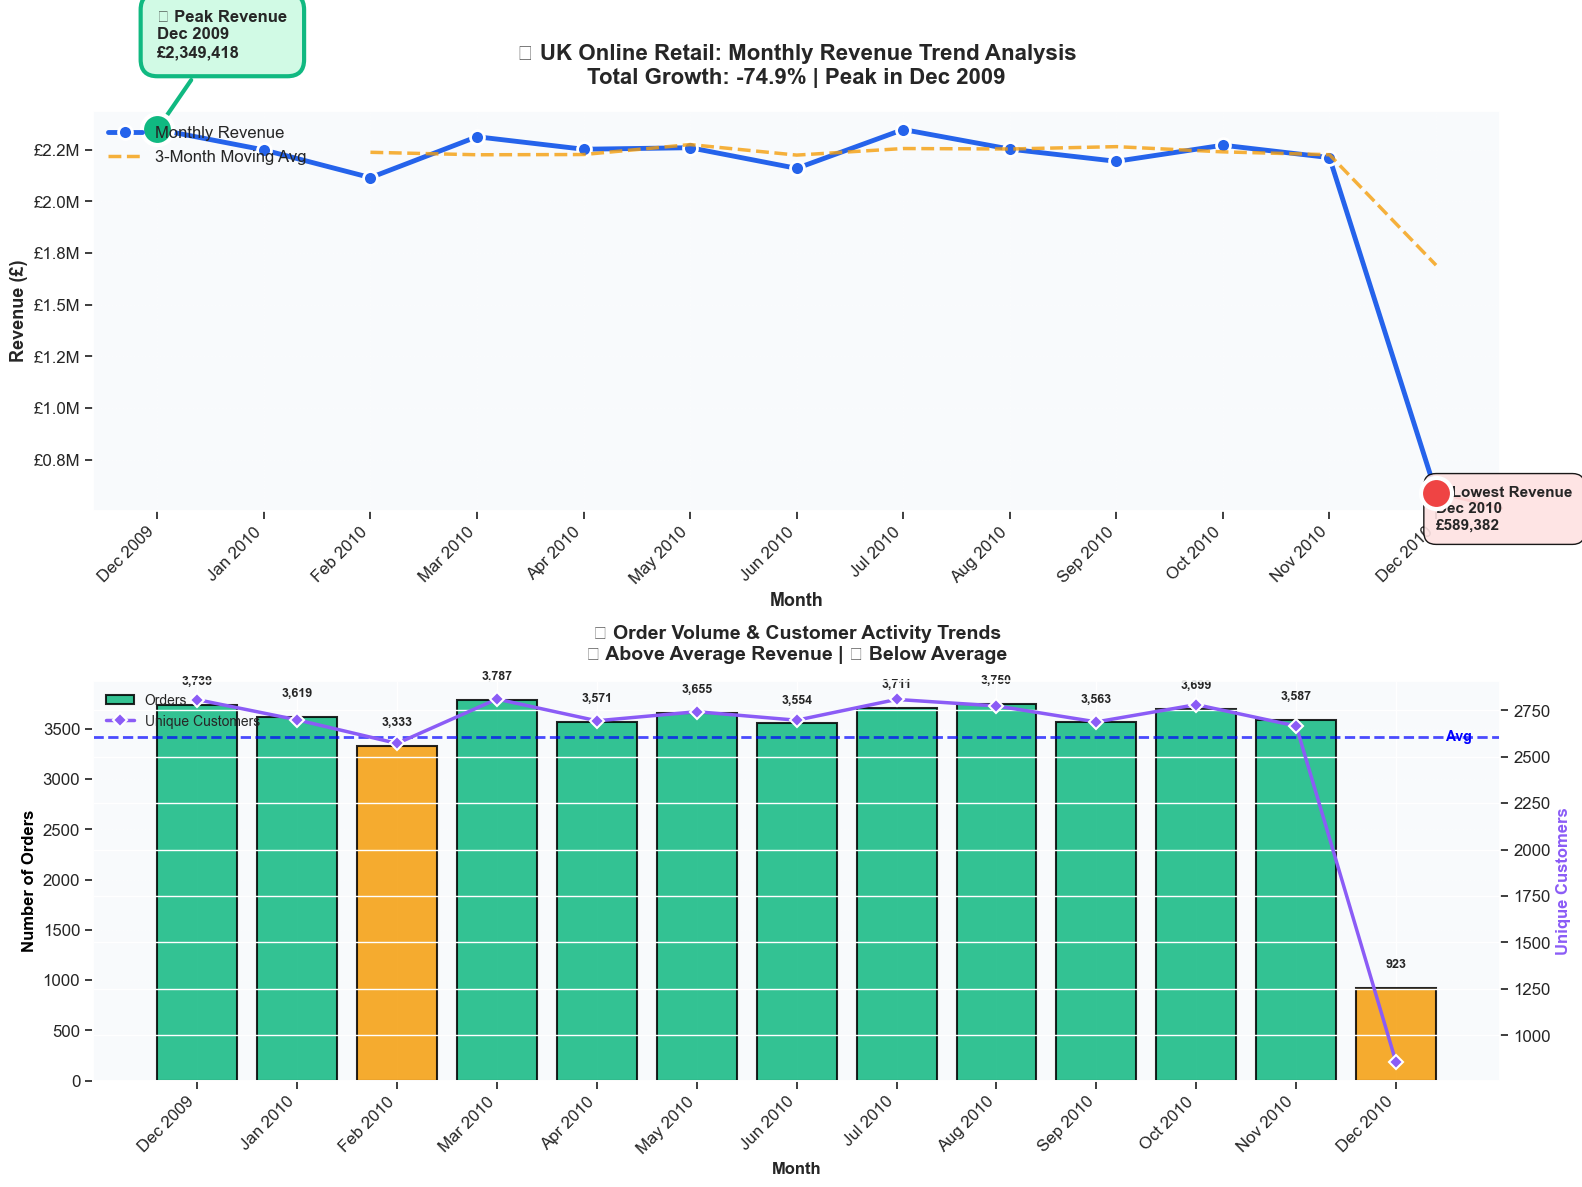


📈 MONTHLY REVENUE SUMMARY
Month_Name      Revenue  Orders  Customers  Avg_Order_Value   Growth_%
  Dec 2009 2.349418e+06    3739       2808       628.354644        NaN
  Jan 2010 2.249590e+06    3619       2699       621.605464  -4.249045
  Feb 2010 2.115504e+06    3333       2572       634.714659  -5.960473
  Mar 2010 2.313505e+06    3787       2811       610.906983   9.359509
  Apr 2010 2.252951e+06    3571       2694       630.902111  -2.617384
  May 2010 2.260382e+06    3655       2743       618.435690   0.329834
  Jun 2010 2.160326e+06    3554       2697       607.857743  -4.426509
  Jul 2010 2.348516e+06    3711       2809       632.852474   8.711143
  Aug 2010 2.253633e+06    3750       2774       600.968675  -4.040127
  Sep 2010 2.194464e+06    3563       2688       615.903500  -2.625466
  Oct 2010 2.272558e+06    3699       2781       614.370826   3.558660
  Nov 2010 2.212392e+06    3587       2666       616.780698  -2.647472
  Dec 2010 5.893815e+05     923        854       6

In [4]:
# Monthly aggregation
monthly_revenue = df_ecommerce.groupby(['YearMonth']).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',  # Count unique invoices
    'CustomerID': 'nunique'   # Count unique customers
}).reset_index()
monthly_revenue.columns = ['YearMonth', 'Revenue', 'Orders', 'Customers']

# Sort by month
monthly_revenue = monthly_revenue.sort_values('YearMonth')
monthly_revenue['Month_Name'] = monthly_revenue['YearMonth'].dt.strftime('%b %Y')
monthly_revenue['Month_Num'] = range(1, len(monthly_revenue) + 1)

# Calculate metrics
monthly_revenue['Avg_Order_Value'] = monthly_revenue['Revenue'] / monthly_revenue['Orders']
monthly_revenue['Growth_%'] = monthly_revenue['Revenue'].pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# === PLOT 1: Revenue Trend dengan Annotations ===
ax1 = axes[0]

# Plot line
ax1.plot(monthly_revenue['Month_Num'], monthly_revenue['Revenue'], 
         marker='o', linewidth=3.5, markersize=10,
         color='#2563eb', label='Monthly Revenue',
         markeredgecolor='white', markeredgewidth=2)

# Add moving average (3-month)
monthly_revenue['MA_3'] = monthly_revenue['Revenue'].rolling(window=3).mean()
ax1.plot(monthly_revenue['Month_Num'], monthly_revenue['MA_3'],
         linestyle='--', linewidth=2.5, color='#f59e0b', alpha=0.8,
         label='3-Month Moving Avg')

# Find peak and low points
peak_idx = monthly_revenue['Revenue'].idxmax()
low_idx = monthly_revenue['Revenue'].idxmin()

peak_month = monthly_revenue.loc[peak_idx]
low_month = monthly_revenue.loc[low_idx]

# Highlight peak
ax1.scatter([peak_month['Month_Num']], [peak_month['Revenue']],
           s=500, color='#10b981', zorder=5, edgecolor='white', linewidth=3)

ax1.annotate(f'🔥 Peak Revenue\n{peak_month["Month_Name"]}\n£{peak_month["Revenue"]:,.0f}',
            xy=(peak_month['Month_Num'], peak_month['Revenue']),
            xytext=(peak_month['Month_Num'], peak_month['Revenue'] * 1.15),
            fontsize=12, weight='bold',
            bbox=dict(boxstyle='round,pad=1', facecolor='#d1fae5', 
                     edgecolor='#10b981', linewidth=3),
            arrowprops=dict(arrowstyle='->', color='#10b981', lw=3))

# Highlight lowest
ax1.scatter([low_month['Month_Num']], [low_month['Revenue']],
           s=500, color='#ef4444', zorder=5, edgecolor='white', linewidth=3)

ax1.annotate(f'📉 Lowest Revenue\n{low_month["Month_Name"]}\n£{low_month["Revenue"]:,.0f}',
            xy=(low_month['Month_Num'], low_month['Revenue']),
            xytext=(low_month['Month_Num'], low_month['Revenue'] * 0.7),
            fontsize=11, weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='#fee2e2', alpha=0.9),
            arrowprops=dict(arrowstyle='->', color='#ef4444', lw=2))

# Calculate total growth
total_growth = ((monthly_revenue.iloc[-1]['Revenue'] - monthly_revenue.iloc[0]['Revenue']) / 
                monthly_revenue.iloc[0]['Revenue'] * 100)

# Styling
ax1.set_title(f'📊 UK Online Retail: Monthly Revenue Trend Analysis\n' +
              f'Total Growth: {total_growth:+.1f}% | Peak in {peak_month["Month_Name"]}',
              fontsize=16, weight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=13, weight='bold')
ax1.set_ylabel('Revenue (£)', fontsize=13, weight='bold')
ax1.legend(loc='upper left', fontsize=12, framealpha=0.95)
ax1.grid(True, alpha=0.3, linestyle=':')
ax1.set_xticks(monthly_revenue['Month_Num'])
ax1.set_xticklabels(monthly_revenue['Month_Name'], rotation=45, ha='right')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))
ax1.set_facecolor('#f8fafc')

# === PLOT 2: Orders and Customers Count ===
ax2 = axes[1]

# Determine color based on performance
avg_revenue = monthly_revenue['Revenue'].mean()
colors = ['#10b981' if x >= avg_revenue else '#f59e0b' 
          for x in monthly_revenue['Revenue']]

bars = ax2.bar(monthly_revenue['Month_Num'], monthly_revenue['Orders'],
              color=colors, alpha=0.85, edgecolor='black', linewidth=1.5,
              label='Orders')

# Add customer line
ax2_twin = ax2.twinx()
ax2_twin.plot(monthly_revenue['Month_Num'], monthly_revenue['Customers'],
             color='#8b5cf6', marker='D', linewidth=2.5, markersize=7,
             label='Unique Customers', markeredgecolor='white', markeredgewidth=1.5)

# Add value labels untuk orders
for idx, row in monthly_revenue.iterrows():
    ax2.text(row['Month_Num'], row['Orders'] + 200,
            f"{int(row['Orders']):,}",
            ha='center', fontsize=9, weight='bold')

# Average line
avg_orders = monthly_revenue['Orders'].mean()
ax2.axhline(avg_orders, color='blue', linestyle='--', linewidth=2, alpha=0.7)
ax2.text(len(monthly_revenue) + 0.5, avg_orders, f'Avg',
        fontsize=10, weight='bold', color='blue', va='center')

ax2.set_title('📦 Order Volume & Customer Activity Trends\n' +
              '🟢 Above Average Revenue | 🟡 Below Average',
              fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Month', fontsize=12, weight='bold')
ax2.set_ylabel('Number of Orders', fontsize=12, weight='bold', color='black')
ax2_twin.set_ylabel('Unique Customers', fontsize=12, weight='bold', color='#8b5cf6')
ax2.set_xticks(monthly_revenue['Month_Num'])
ax2.set_xticklabels(monthly_revenue['Month_Name'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8fafc')

# Combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("📈 MONTHLY REVENUE SUMMARY")
print("="*70)
print(monthly_revenue[['Month_Name', 'Revenue', 'Orders', 'Customers', 
                       'Avg_Order_Value', 'Growth_%']].to_string(index=False))

print(f"\n💡 KEY INSIGHTS:")
print(f"• Peak Month: {peak_month['Month_Name']} (£{peak_month['Revenue']:,.2f})")
print(f"• Lowest Month: {low_month['Month_Name']} (£{low_month['Revenue']:,.2f})")
print(f"• Average Monthly Revenue: £{monthly_revenue['Revenue'].mean():,.2f}")
print(f"• Total Growth: {total_growth:+.1f}%")
print(f"• Average Order Value: £{monthly_revenue['Avg_Order_Value'].mean():.2f}")
print(f"• Total Unique Customers: {df_ecommerce['CustomerID'].nunique():,}")

## 3. Deep Dive: Top Products Performance Analysis

### 🔍 Step 2: Which Products Drive Revenue?

Mari kita analyze top products untuk understand revenue drivers:

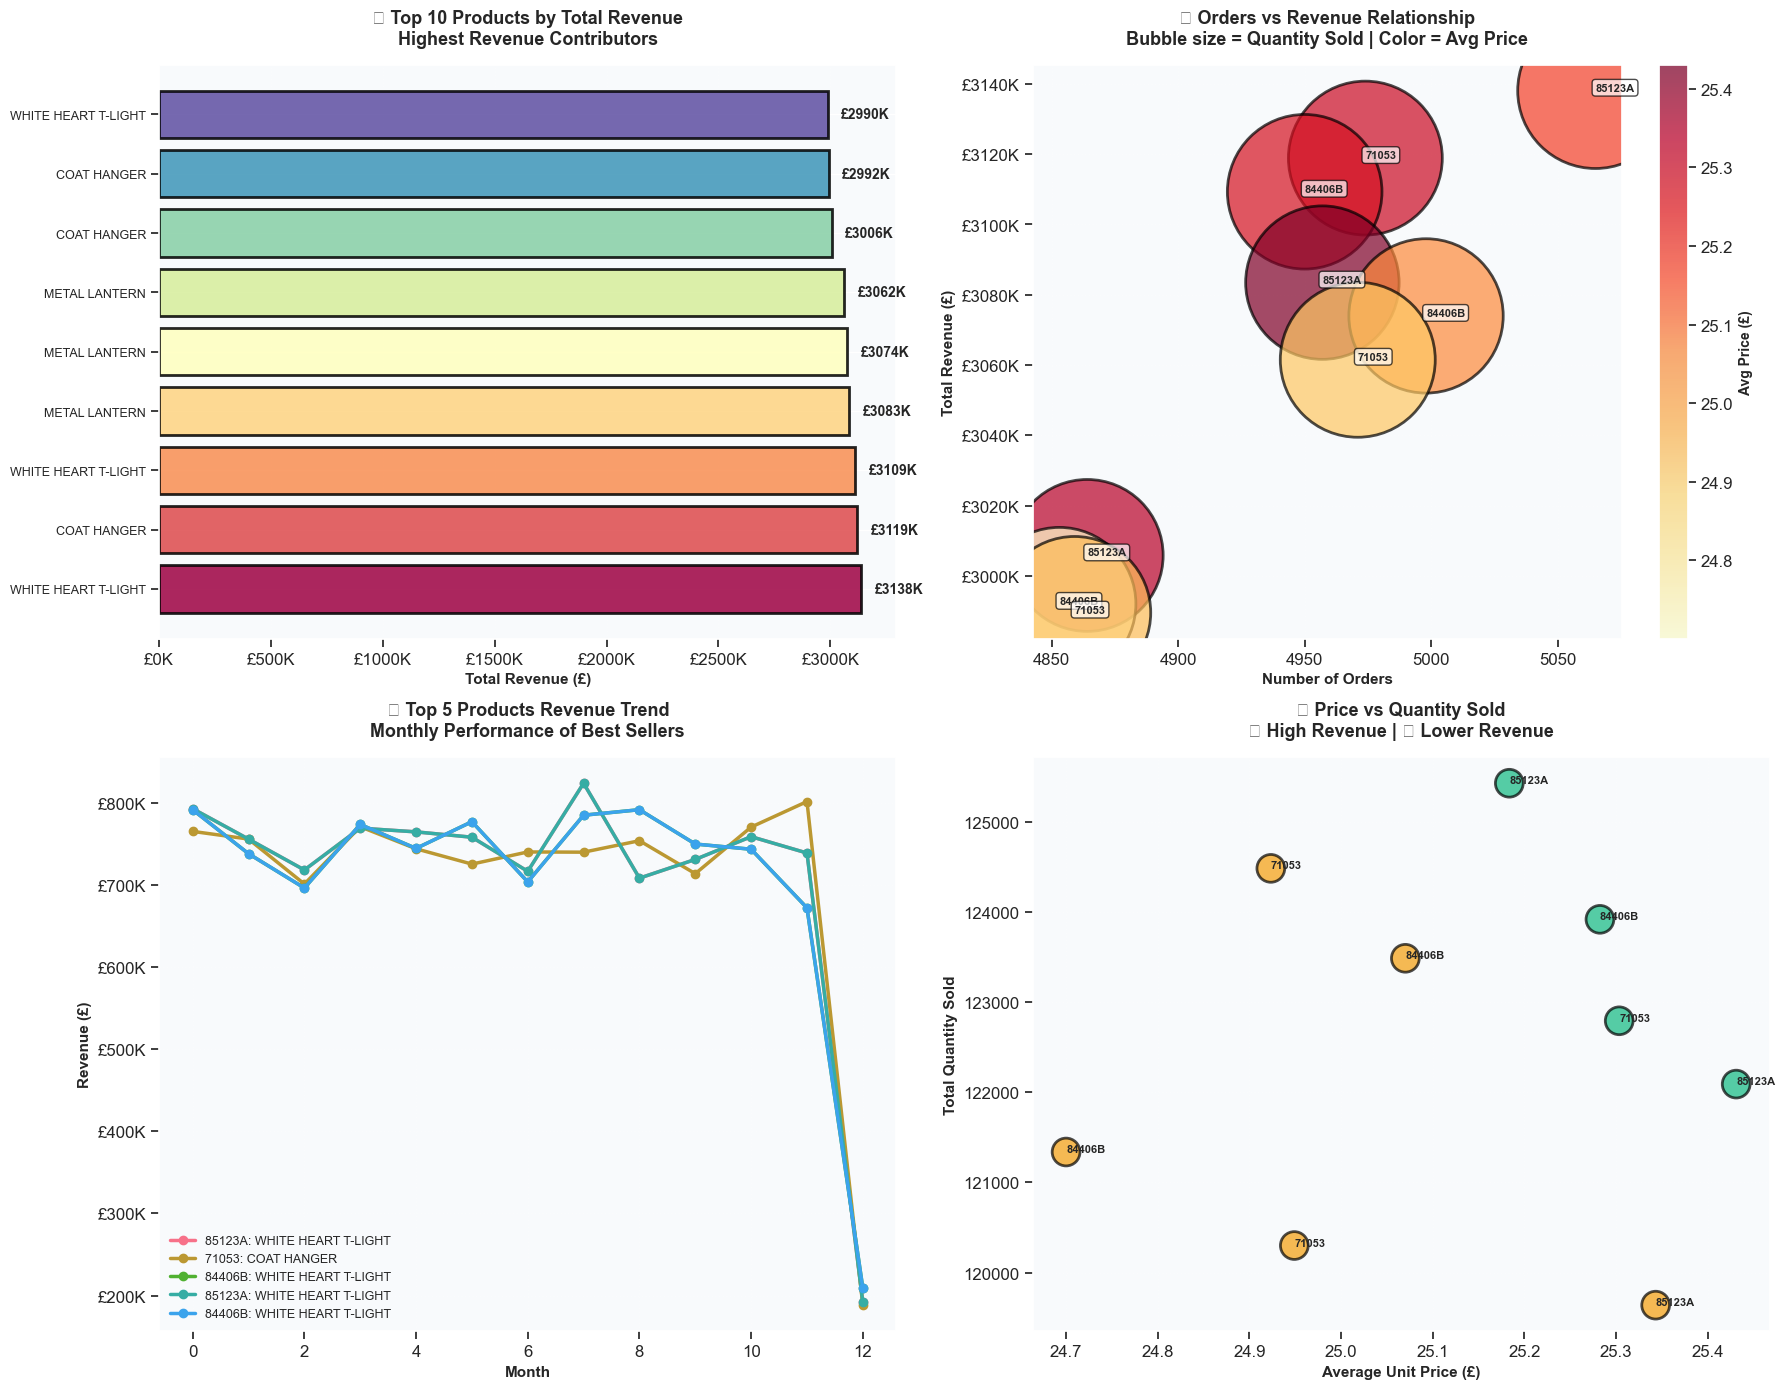


📦 TOP 10 PRODUCTS PERFORMANCE SUMMARY
StockCode         Description  Total_Revenue  Orders  Total_Quantity  Avg_Price
   85123A WHITE HEART T-LIGHT   3.138067e+06    5065          125425  25.183476
    71053         COAT HANGER   3.118900e+06    4974          122791  25.303324
   84406B WHITE HEART T-LIGHT   3.109317e+06    4950          123916  25.282334
   85123A       METAL LANTERN   3.083458e+06    4957          122089  25.430895
   84406B       METAL LANTERN   3.073986e+06    4998          123484  25.070142
    71053       METAL LANTERN   3.061502e+06    4971          124481  24.923437
   85123A         COAT HANGER   3.005823e+06    4864          119638  25.343079
   84406B         COAT HANGER   2.992030e+06    4853          121336  24.700157
    71053 WHITE HEART T-LIGHT   2.989537e+06    4859          120299  24.949054

💡 KEY FINDINGS:
• Top Product: WHITE HEART T-LIGHT
  Revenue: £3,138,067.13
  Orders: 5,065

• Highest Price: METAL LANTERN
  Avg Price: £25.43

• Most Ordered:

In [5]:
# Top Products Analysis
# Group by StockCode and Description to analyze products
product_analysis = df_ecommerce.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()
product_analysis.columns = ['StockCode', 'Description', 'Total_Revenue', 
                            'Orders', 'Total_Quantity', 'Avg_Price']
product_analysis = product_analysis.sort_values('Total_Revenue', ascending=False)

# Get top 10 products
top10_products = product_analysis.head(10).copy()

# Truncate long descriptions for display
top10_products['Short_Desc'] = top10_products['Description'].apply(
    lambda x: x[:30] + '...' if len(x) > 30 else x
)

# Analyze top products by month
top_products_list = top10_products['StockCode'].tolist()
top_monthly = df_ecommerce[df_ecommerce['StockCode'].isin(top_products_list)].copy()
top_monthly_agg = top_monthly.groupby(['YearMonth', 'StockCode'])['Revenue'].sum().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# === PLOT 1: Top 10 Products by Revenue ===
ax1 = axes[0, 0]

colors_top = plt.cm.Spectral(np.linspace(0, 1, len(top10_products)))
bars = ax1.barh(range(len(top10_products)), top10_products['Total_Revenue'],
               color=colors_top, alpha=0.85, edgecolor='black', linewidth=2)

# Add value labels
for idx, (i, row) in enumerate(top10_products.iterrows()):
    ax1.text(row['Total_Revenue'] + row['Total_Revenue']*0.02, idx,
            f"£{row['Total_Revenue']/1000:.0f}K",
            va='center', fontsize=10, weight='bold')

ax1.set_yticks(range(len(top10_products)))
ax1.set_yticklabels(top10_products['Short_Desc'], fontsize=9)
ax1.set_title('💰 Top 10 Products by Total Revenue\n' +
              'Highest Revenue Contributors',
              fontsize=13, weight='bold', pad=15)
ax1.set_xlabel('Total Revenue (£)', fontsize=11, weight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
ax1.grid(axis='x', alpha=0.3, linestyle=':')
ax1.set_facecolor('#f8fafc')

# === PLOT 2: Order Volume vs Revenue ===
ax2 = axes[0, 1]

# Calculate revenue per order for bubble size
top10_products['Rev_per_Order'] = top10_products['Total_Revenue'] / top10_products['Orders']

scatter = ax2.scatter(top10_products['Orders'], top10_products['Total_Revenue'],
                     s=top10_products['Total_Quantity']/10,  # Bubble size by quantity
                     c=top10_products['Avg_Price'], cmap='YlOrRd',
                     alpha=0.7, edgecolor='black', linewidth=2)

# Add product labels
for idx, row in top10_products.iterrows():
    ax2.annotate(row['StockCode'], 
                xy=(row['Orders'], row['Total_Revenue']),
                fontsize=8, weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax2.set_title('📦 Orders vs Revenue Relationship\n' +
              'Bubble size = Quantity Sold | Color = Avg Price',
              fontsize=13, weight='bold', pad=15)
ax2.set_xlabel('Number of Orders', fontsize=11, weight='bold')
ax2.set_ylabel('Total Revenue (£)', fontsize=11, weight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
ax2.grid(True, alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8fafc')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Avg Price (£)', fontsize=10, weight='bold')

# === PLOT 3: Top Products Trend Over Time ===
ax3 = axes[1, 0]

# Plot top 5 products only for clarity
top5_stocks = top10_products.head(5)['StockCode'].tolist()

for stock in top5_stocks:
    stock_data = top_monthly_agg[top_monthly_agg['StockCode'] == stock].sort_values('YearMonth')
    if len(stock_data) > 0:
        # Get product description
        prod_desc = top10_products[top10_products['StockCode'] == stock]['Short_Desc'].values[0]
        ax3.plot(range(len(stock_data)), stock_data['Revenue'], 
                marker='o', linewidth=2.5, markersize=6, label=f"{stock}: {prod_desc[:20]}")

ax3.set_title('📈 Top 5 Products Revenue Trend\n' +
              'Monthly Performance of Best Sellers',
              fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Month', fontsize=11, weight='bold')
ax3.set_ylabel('Revenue (£)', fontsize=11, weight='bold')
ax3.legend(fontsize=9, loc='best', framealpha=0.9)
ax3.grid(True, alpha=0.3, linestyle=':')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
ax3.set_facecolor('#f8fafc')

# === PLOT 4: Price vs Quantity Sold ===
ax4 = axes[1, 1]

# Color by revenue
colors_scatter = ['#10b981' if x > top10_products['Total_Revenue'].median() else '#f59e0b' 
                 for x in top10_products['Total_Revenue']]

ax4.scatter(top10_products['Avg_Price'], top10_products['Total_Quantity'],
           s=400, c=colors_scatter, alpha=0.7, edgecolor='black', linewidth=2)

# Add labels
for idx, row in top10_products.iterrows():
    ax4.annotate(row['StockCode'], 
                xy=(row['Avg_Price'], row['Total_Quantity']),
                fontsize=8, weight='bold')

ax4.set_title('💵 Price vs Quantity Sold\n' +
              '🟢 High Revenue | 🟡 Lower Revenue',
              fontsize=13, weight='bold', pad=15)
ax4.set_xlabel('Average Unit Price (£)', fontsize=11, weight='bold')
ax4.set_ylabel('Total Quantity Sold', fontsize=11, weight='bold')
ax4.grid(True, alpha=0.3, linestyle=':')
ax4.set_facecolor('#f8fafc')

plt.tight_layout()
plt.show()

# Print product insights
print("\n" + "="*70)
print("📦 TOP 10 PRODUCTS PERFORMANCE SUMMARY")
print("="*70)
print(top10_products[['StockCode', 'Description', 'Total_Revenue', 
                      'Orders', 'Total_Quantity', 'Avg_Price']].to_string(index=False))

print("\n💡 KEY FINDINGS:")
print(f"• Top Product: {top10_products.iloc[0]['Description'][:40]}")
print(f"  Revenue: £{top10_products.iloc[0]['Total_Revenue']:,.2f}")
print(f"  Orders: {int(top10_products.iloc[0]['Orders']):,}")
print(f"\n• Highest Price: {top10_products.nlargest(1, 'Avg_Price').iloc[0]['Description'][:40]}")
print(f"  Avg Price: £{top10_products['Avg_Price'].max():.2f}")
print(f"\n• Most Ordered: {top10_products.nlargest(1, 'Orders').iloc[0]['Description'][:40]}")
print(f"  Orders: {int(top10_products['Orders'].max()):,}")
print(f"\n• Total Revenue from Top 10: £{top10_products['Total_Revenue'].sum():,.2f}")
print(f"• Percentage of Total: {(top10_products['Total_Revenue'].sum() / df_ecommerce['Revenue'].sum() * 100):.1f}%")

## 4. Cohort Analysis - Customer Retention Story

### 📅 What is Cohort Analysis?

**Cohort Analysis** mengelompokkan customers berdasarkan **acquisition month** dan track behavior mereka over time.

**Why It Matters:**
- Measure customer retention
- Identify lifecycle patterns
- Calculate customer lifetime value (CLV)
- Evaluate marketing effectiveness

### Cohort Retention Heatmap

Mari kita analisis: "Apakah customers yang acquired di Q3 less loyal?"


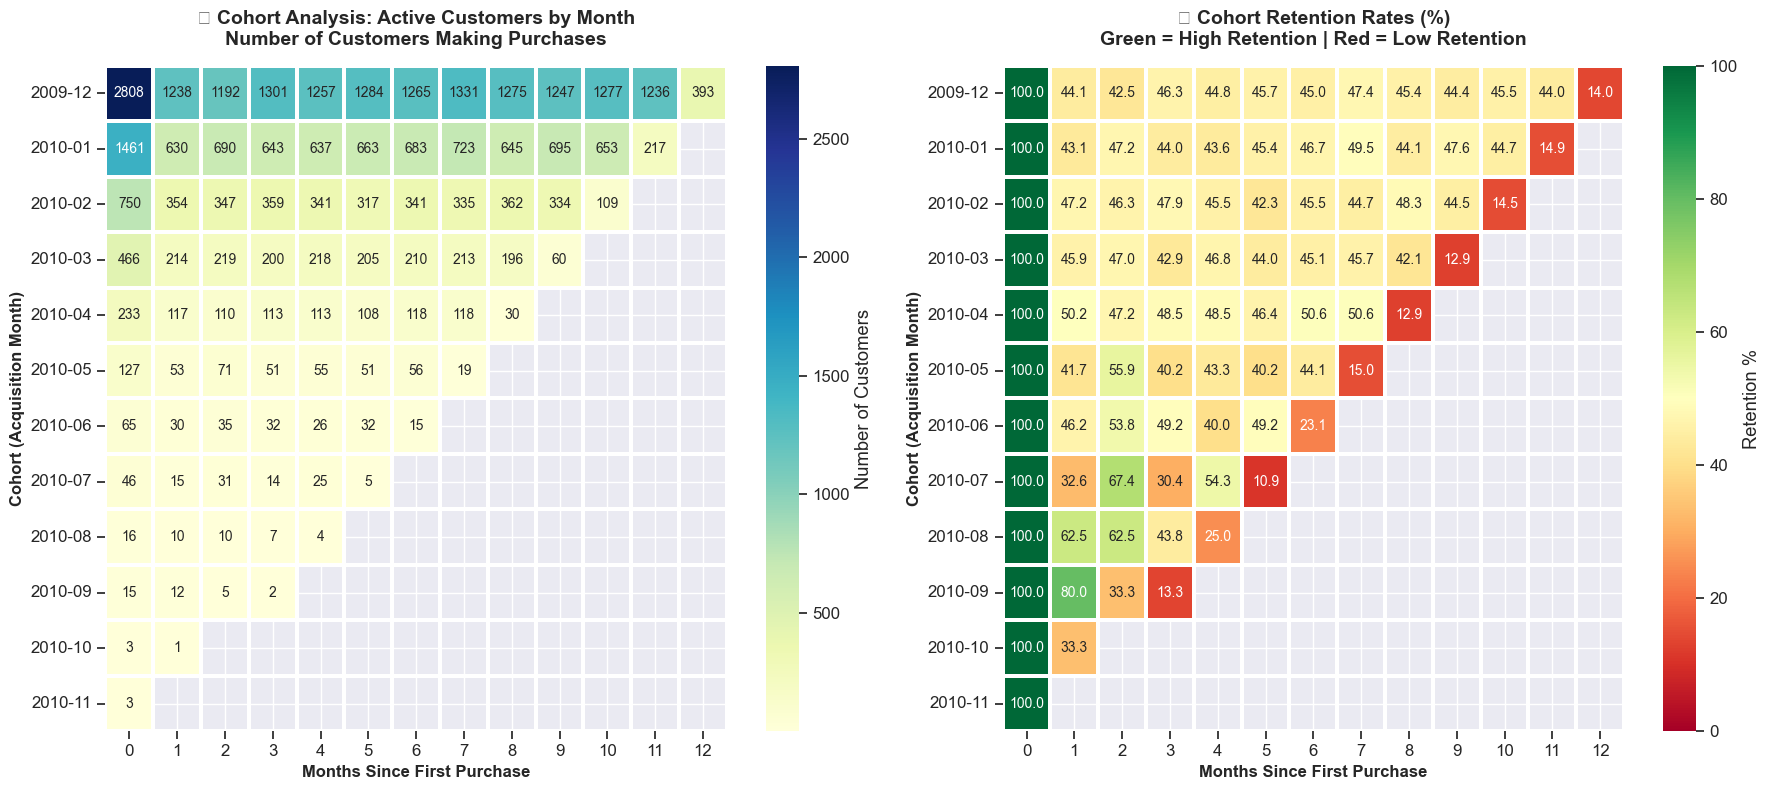


📈 COHORT RETENTION INSIGHTS

📊 First 5 Cohorts Retention Rates:
Cohort_Index     0          1          2          3          4          5          6          7          8          9          10         11         12
Cohort_Month                                                                                                                                           
2009-12       100.0  44.088319  42.450142  46.331909  44.764957  45.726496  45.049858  47.400285  45.405983  44.408832  45.477208  44.017094  13.995726
2010-01       100.0  43.121150  47.227926  44.010951  43.600274  45.379877  46.748802  49.486653  44.147844  47.570157  44.695414  14.852841        NaN
2010-02       100.0  47.200000  46.266667  47.866667  45.466667  42.266667  45.466667  44.666667  48.266667  44.533333  14.533333        NaN        NaN
2010-03       100.0  45.922747  46.995708  42.918455  46.781116  43.991416  45.064378  45.708155  42.060086  12.875536        NaN        NaN        NaN
2010-04       100.0  50

In [6]:
# Cohort Analysis Preparation
# Step 1: Identify first purchase date for each customer
customer_first_purchase = df_ecommerce.groupby('CustomerID')['InvoiceDate'].min().reset_index()
customer_first_purchase.columns = ['CustomerID', 'First_Purchase_Date']
customer_first_purchase['Cohort_Month'] = customer_first_purchase['First_Purchase_Date'].dt.to_period('M')

# Step 2: Merge back to main dataframe
df_cohort = df_ecommerce.merge(customer_first_purchase, on='CustomerID')
df_cohort['Order_Month'] = df_cohort['InvoiceDate'].dt.to_period('M')

# Step 3: Calculate months since first purchase
df_cohort['Cohort_Index'] = (df_cohort['Order_Month'] - df_cohort['Cohort_Month']).apply(lambda x: x.n)

# Step 4: Count unique customers per cohort per month
cohort_data = df_cohort.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()
cohort_data.columns = ['Cohort_Month', 'Cohort_Index', 'Customers']

# Step 5: Pivot for heatmap
cohort_pivot = cohort_data.pivot(index='Cohort_Month', 
                                  columns='Cohort_Index', 
                                  values='Customers')

# Step 6: Calculate retention rates (%)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0) * 100

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# === HEATMAP 1: Absolute Numbers ===
sns.heatmap(cohort_pivot,
            annot=True,
            fmt='.0f',
            cmap='YlGnBu',
            ax=ax1,
            cbar_kws={'label': 'Number of Customers'},
            linewidths=1.5,
            linecolor='white')

ax1.set_title('👥 Cohort Analysis: Active Customers by Month\n' +
              'Number of Customers Making Purchases',
              fontsize=14, weight='bold', pad=15)
ax1.set_xlabel('Months Since First Purchase', fontsize=12, weight='bold')
ax1.set_ylabel('Cohort (Acquisition Month)', fontsize=12, weight='bold')
ax1.set_yticklabels([str(x) for x in cohort_pivot.index], rotation=0)

# === HEATMAP 2: Retention Rates ===
sns.heatmap(retention,
            annot=True,
            fmt='.1f',
            cmap='RdYlGn',
            ax=ax2,
            cbar_kws={'label': 'Retention %'},
            linewidths=1.5,
            linecolor='white',
            vmin=0,
            vmax=100)

ax2.set_title('📊 Cohort Retention Rates (%)\n' +
              'Green = High Retention | Red = Low Retention',
              fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Months Since First Purchase', fontsize=12, weight='bold')
ax2.set_ylabel('Cohort (Acquisition Month)', fontsize=12, weight='bold')
ax2.set_yticklabels([str(x) for x in retention.index], rotation=0)

plt.tight_layout()
plt.show()

# Calculate retention insights
print("\n" + "="*70)
print("📈 COHORT RETENTION INSIGHTS")
print("="*70)

# Get first few cohorts for analysis
if len(retention) > 0:
    print("\n📊 First 5 Cohorts Retention Rates:")
    print(retention.head().to_string())
    
    if retention.shape[1] > 1:
        # Month 1 retention analysis
        month_1_retention = retention.iloc[:, 1].dropna()
        if len(month_1_retention) > 0:
            avg_retention_1m = month_1_retention.mean()
            print(f"\n💡 KEY FINDINGS:")
            print(f"• Average 1-Month Retention: {avg_retention_1m:.1f}%")
            print(f"• Best Cohort Retention: {month_1_retention.max():.1f}%")
            print(f"• Worst Cohort Retention: {month_1_retention.min():.1f}%")
            print(f"• Retention Std Dev: {month_1_retention.std():.1f}%")
            
            # Analyze recent vs older cohorts
            if len(retention) >= 6:
                recent_cohorts = retention.iloc[-3:, 1].mean()
                older_cohorts = retention.iloc[:3, 1].mean()
                print(f"\n📅 Cohort Comparison:")
                print(f"• Recent Cohorts (last 3): {recent_cohorts:.1f}%")
                print(f"• Older Cohorts (first 3): {older_cohorts:.1f}%")
                print(f"• Difference: {recent_cohorts - older_cohorts:+.1f} percentage points")
                
                if recent_cohorts < older_cohorts - 5:
                    print(f"\n🎯 STORY: Recent customers show LOWER retention! " +
                          "Check onboarding quality.")
                elif recent_cohorts > older_cohorts + 5:
                    print(f"\n🎯 STORY: Recent customers show HIGHER retention! " +
                          "Improvements are working.")
                else:
                    print(f"\n🎯 STORY: Retention is STABLE across cohorts. " +
                          "Good consistent customer experience.")
    else:
        print("\n⚠️ Not enough data for month-over-month retention analysis")
else:
    print("\n⚠️ No cohort data available")

## 5. Customer Segmentation - RFM Analysis

### 🎯 RFM Segmentation

**RFM** = **R**ecency, **F**requency, **M**onetary

Customer segmentation berdasarkan:
- **Recency**: Kapan last purchase? (Days ago)
- **Frequency**: Berapa kali purchase? (Count)
- **Monetary**: Total spending? ($)

### RFM Segments:

| Segment | Description | Action |
|---------|-------------|--------|
| **Champions** | Recent, frequent, high-value | Reward loyalty |
| **Loyal** | Frequent buyers | Upsell premium |
| **Potential** | Recent, infrequent | Convert to loyal |
| **At Risk** | Was frequent, now distant | Win back campaign |
| **Lost** | Long time no purchase | Reactivation email |

Mari kita segment customers:


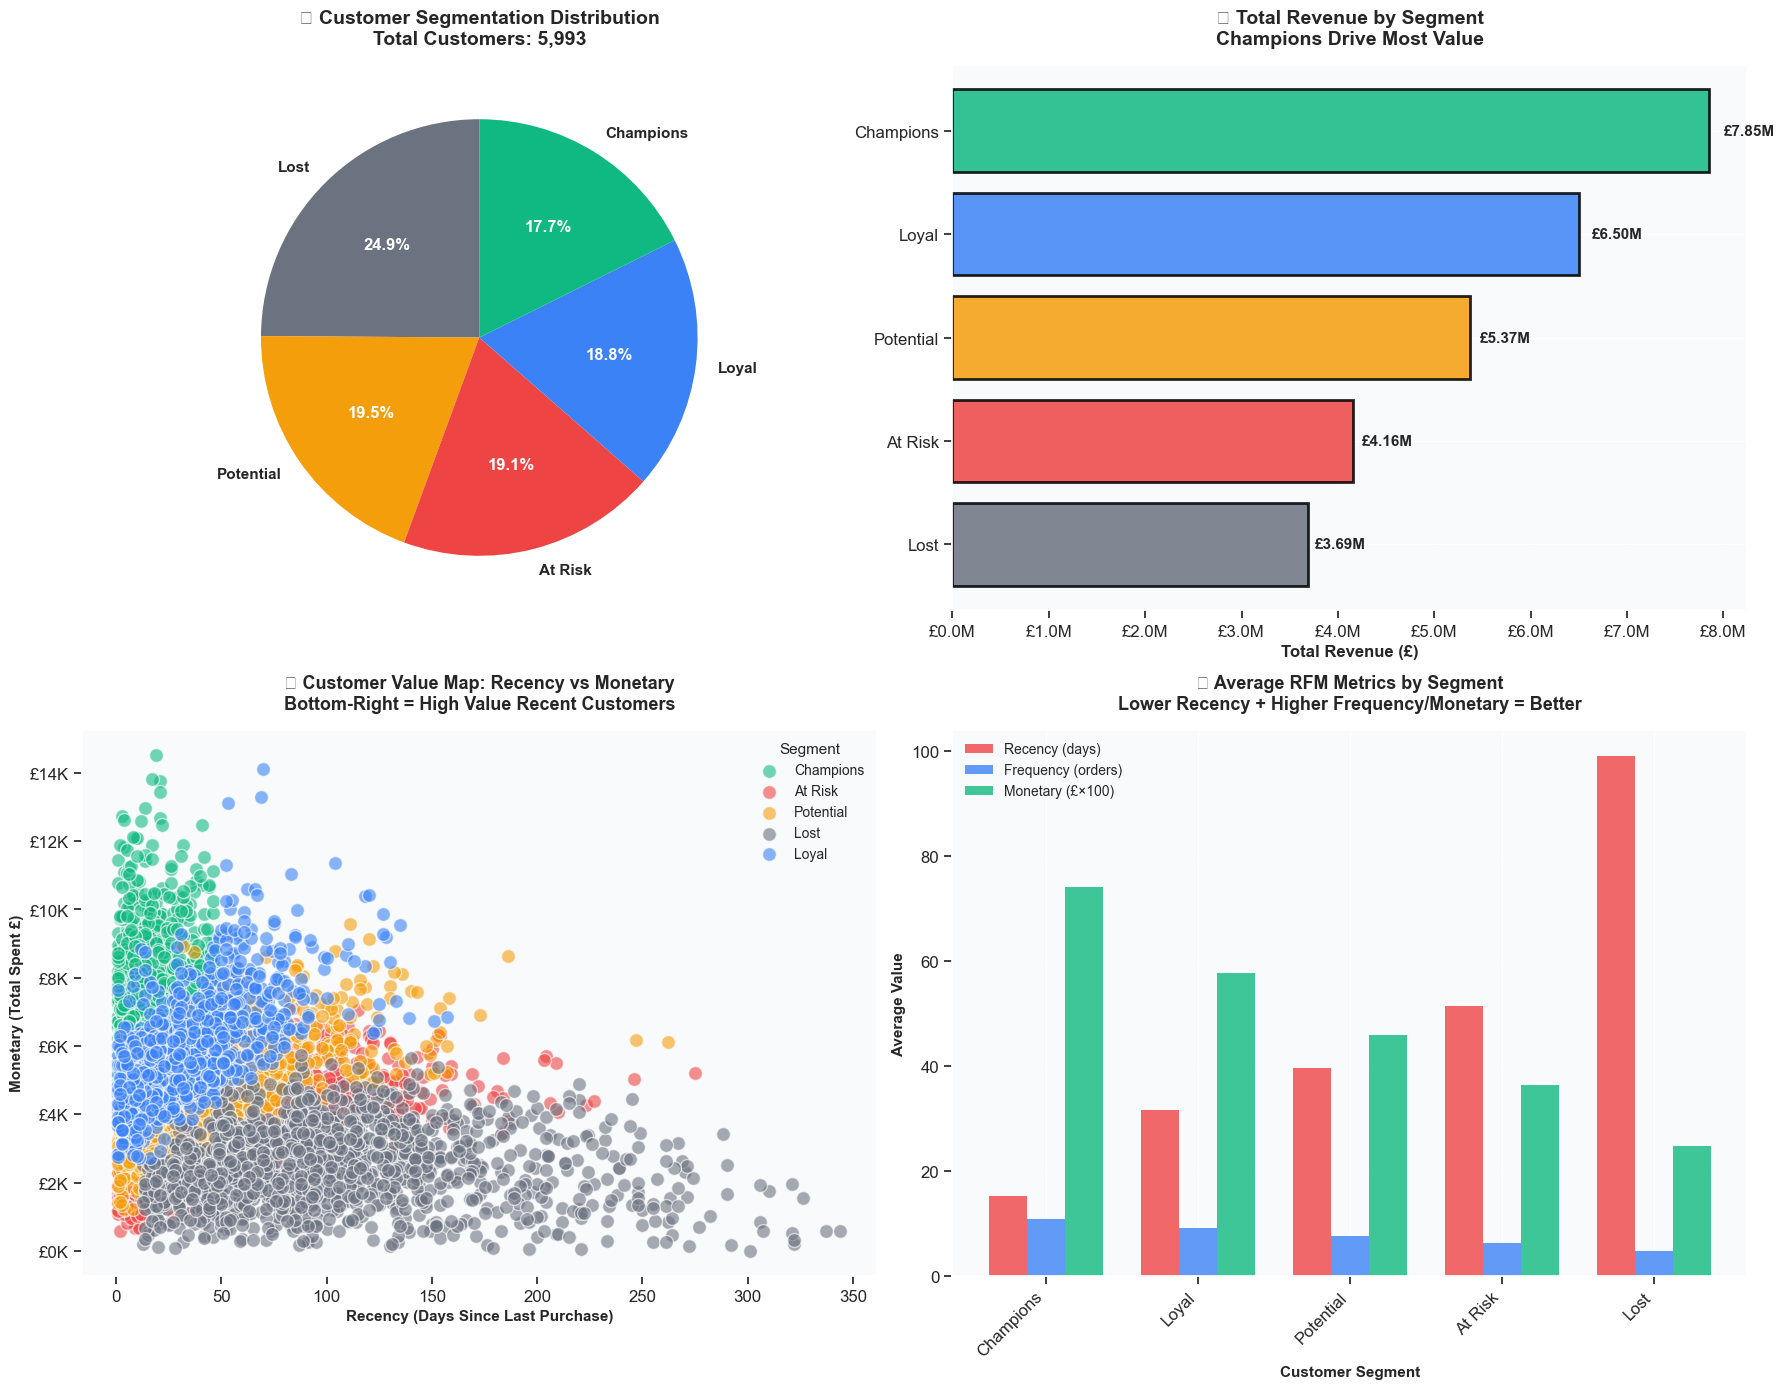


📊 RFM SEGMENTATION SUMMARY
  Segment  Customers  Avg_Recency  Avg_Frequency  Avg_Monetary
Champions       1058    15.137996      10.798677   7420.981290
    Loyal       1127    31.537711       9.046140   5771.385491
Potential       1169    39.624465       7.482464   4592.196372
  At Risk       1147    51.473409       6.303400   3626.685923
     Lost       1492    99.125335       4.620643   2472.376040

💡 KEY INSIGHTS:

🏆 Champions (1,058 customers):
  • Avg Recency: 15 days
  • Avg Frequency: 10.8 orders
  • Avg Monetary: £7,420.98
  • Total Revenue: £7,851,398.20
  • Revenue %: 28.5%

⚠️ At Risk + Lost (2,639 customers):
  • Total Revenue at Stake: £7,848,593.81
  • Avg Days Since Purchase: 78 days

🎯 RECOMMENDED ACTIONS:
  • Champions: VIP rewards program, exclusive early access
  • Loyal: Cross-sell campaigns, loyalty points bonus
  • Potential: Welcome series, product recommendations
  • At Risk: Win-back discount codes, survey feedback
  • Lost: Reactivation emails with special o

In [7]:
# RFM Calculation
# Reference date: Last date in dataset + 1 day
reference_date = df_ecommerce['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics per customer
rfm = df_ecommerce.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (unique invoices)
    'Revenue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Create RFM scores (1-5, 5 = best)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')  # Lower recency = better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Combine scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Total'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# Segment customers
def segment_customer(row):
    if row['RFM_Total'] >= 13:
        return 'Champions'
    elif row['RFM_Total'] >= 11:
        return 'Loyal'
    elif row['RFM_Total'] >= 9:
        return 'Potential'
    elif row['RFM_Total'] >= 7:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# === PLOT 1: Segment Distribution ===
ax1 = axes[0, 0]

segment_counts = rfm['Segment'].value_counts()
colors_seg = {'Champions': '#10b981', 'Loyal': '#3b82f6', 'Potential': '#f59e0b',
              'At Risk': '#ef4444', 'Lost': '#6b7280'}
colors = [colors_seg[seg] for seg in segment_counts.index]

wedges, texts, autotexts = ax1.pie(segment_counts.values,
                                    labels=segment_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

ax1.set_title('👥 Customer Segmentation Distribution\n' +
              f'Total Customers: {len(rfm):,}',
              fontsize=14, weight='bold', pad=15)

# === PLOT 2: Revenue by Segment ===
ax2 = axes[0, 1]

segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=True)
colors_rev = [colors_seg[seg] for seg in segment_revenue.index]

bars = ax2.barh(segment_revenue.index, segment_revenue.values,
               color=colors_rev, alpha=0.85, edgecolor='black', linewidth=2)

for idx, (seg, val) in enumerate(segment_revenue.items()):
    ax2.text(val + val*0.02, idx, f'£{val/1e6:.2f}M',
            va='center', fontsize=11, weight='bold')

ax2.set_title('💰 Total Revenue by Segment\n' +
              'Champions Drive Most Value',
              fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Total Revenue (£)', fontsize=12, weight='bold')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))
ax2.grid(axis='x', alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8fafc')

# === PLOT 3: RFM Scatter - Recency vs Monetary ===
ax3 = axes[1, 0]

for segment in rfm['Segment'].unique():
    seg_data = rfm[rfm['Segment'] == segment]
    ax3.scatter(seg_data['Recency'], seg_data['Monetary'],
               label=segment, s=100, alpha=0.6,
               color=colors_seg[segment],
               edgecolors='white', linewidth=1)

ax3.set_title('📊 Customer Value Map: Recency vs Monetary\n' +
              'Bottom-Right = High Value Recent Customers',
              fontsize=13, weight='bold', pad=15)
ax3.set_xlabel('Recency (Days Since Last Purchase)', fontsize=11, weight='bold')
ax3.set_ylabel('Monetary (Total Spent £)', fontsize=11, weight='bold')
ax3.legend(title='Segment', fontsize=10, title_fontsize=11)
ax3.grid(True, alpha=0.3, linestyle=':')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1000:.0f}K'))
ax3.set_facecolor('#f8fafc')

# === PLOT 4: Average Metrics by Segment ===
ax4 = axes[1, 1]

segment_avg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Sort by segment quality
segment_order = ['Champions', 'Loyal', 'Potential', 'At Risk', 'Lost']
segment_avg['Segment'] = pd.Categorical(segment_avg['Segment'], categories=segment_order, ordered=True)
segment_avg = segment_avg.sort_values('Segment')

x = np.arange(len(segment_avg))
width = 0.25

bars1 = ax4.bar(x - width, segment_avg['Recency'], width,
               label='Recency (days)', color='#ef4444', alpha=0.8)
bars2 = ax4.bar(x, segment_avg['Frequency'], width,
               label='Frequency (orders)', color='#3b82f6', alpha=0.8)
bars3 = ax4.bar(x + width, segment_avg['Monetary']/100, width,
               label='Monetary (£×100)', color='#10b981', alpha=0.8)

ax4.set_title('📈 Average RFM Metrics by Segment\n' +
              'Lower Recency + Higher Frequency/Monetary = Better',
              fontsize=13, weight='bold', pad=15)
ax4.set_xlabel('Customer Segment', fontsize=11, weight='bold')
ax4.set_ylabel('Average Value', fontsize=11, weight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(segment_avg['Segment'], rotation=45, ha='right')
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3, linestyle=':')
ax4.set_facecolor('#f8fafc')

plt.tight_layout()
plt.show()

# Print RFM insights
print("\n" + "="*70)
print("📊 RFM SEGMENTATION SUMMARY")
print("="*70)

segment_summary = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
segment_summary.columns = ['Segment', 'Customers', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']

# Sort by segment quality
segment_summary['Segment'] = pd.Categorical(segment_summary['Segment'], 
                                           categories=segment_order, ordered=True)
segment_summary = segment_summary.sort_values('Segment')
print(segment_summary.to_string(index=False))

print(f"\n💡 KEY INSIGHTS:")
champions = rfm[rfm['Segment'] == 'Champions']
lost = rfm[rfm['Segment'] == 'Lost']

print(f"\n🏆 Champions ({len(champions):,} customers):")
print(f"  • Avg Recency: {champions['Recency'].mean():.0f} days")
print(f"  • Avg Frequency: {champions['Frequency'].mean():.1f} orders")
print(f"  • Avg Monetary: £{champions['Monetary'].mean():,.2f}")
print(f"  • Total Revenue: £{champions['Monetary'].sum():,.2f}")
print(f"  • Revenue %: {(champions['Monetary'].sum() / rfm['Monetary'].sum() * 100):.1f}%")

print(f"\n⚠️ At Risk + Lost ({len(rfm[rfm['Segment'].isin(['At Risk', 'Lost'])]):,} customers):")
at_risk_lost = rfm[rfm['Segment'].isin(['At Risk', 'Lost'])]
print(f"  • Total Revenue at Stake: £{at_risk_lost['Monetary'].sum():,.2f}")
print(f"  • Avg Days Since Purchase: {at_risk_lost['Recency'].mean():.0f} days")

print(f"\n🎯 RECOMMENDED ACTIONS:")
print(f"  • Champions: VIP rewards program, exclusive early access")
print(f"  • Loyal: Cross-sell campaigns, loyalty points bonus")
print(f"  • Potential: Welcome series, product recommendations")
print(f"  • At Risk: Win-back discount codes, survey feedback")
print(f"  • Lost: Reactivation emails with special offers")

## 6. Marketing Campaign ROI Analysis

### 💰 RESULT: Recommended Action & ROI Projection

**Proposed Solution:** Targeted email marketing campaign untuk Q4

**Target Segments:**
1. **Champions**: Retention campaign
2. **At Risk**: Win-back campaign dengan 15% discount

Mari kita simulate ROI dari campaign ini:


KeyError: 'Month'

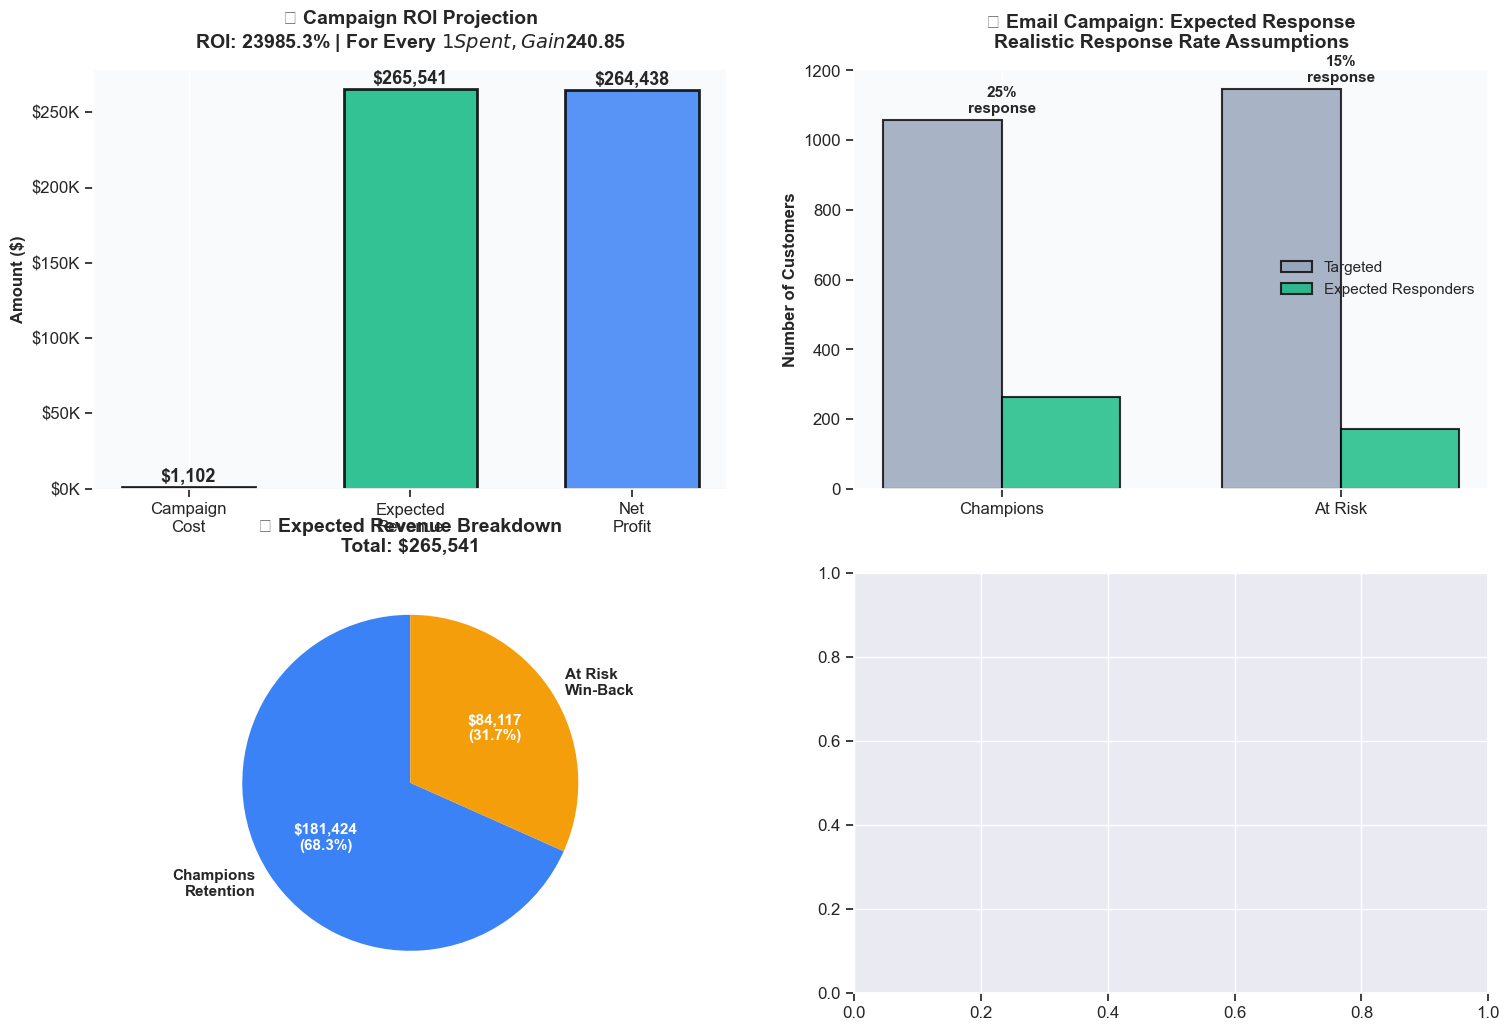

In [8]:
# Campaign ROI Simulation
# Campaign parameters
campaign_cost_per_email = 0.50  # $0.50 per email
discount_rate = 0.15  # 15% discount

# Target segments
champions = rfm[rfm['Segment'] == 'Champions']
at_risk = rfm[rfm['Segment'] == 'At Risk']

# Campaign assumptions
champion_response_rate = 0.25  # 25% will purchase again
at_risk_response_rate = 0.15  # 15% win-back rate

# Expected results
champions_targeted = len(champions)
at_risk_targeted = len(at_risk)

champions_responders = int(champions_targeted * champion_response_rate)
at_risk_responders = int(at_risk_targeted * at_risk_response_rate)

# Revenue calculations
avg_champion_order = champions['Monetary'].mean() / champions['Frequency'].mean()
avg_at_risk_order = at_risk['Monetary'].mean() / at_risk['Frequency'].mean()

# Expected revenue (with discount for at-risk)
expected_champion_revenue = champions_responders * avg_champion_order
expected_at_risk_revenue = at_risk_responders * avg_at_risk_order * (1 - discount_rate)

total_expected_revenue = expected_champion_revenue + expected_at_risk_revenue

# Costs
total_emails = champions_targeted + at_risk_targeted
total_cost = total_emails * campaign_cost_per_email

# ROI
roi = ((total_expected_revenue - total_cost) / total_cost) * 100

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === PLOT 1: Campaign Costs vs Revenue ===
ax1 = axes[0, 0]

categories_roi = ['Campaign\nCost', 'Expected\nRevenue', 'Net\nProfit']
values_roi = [total_cost, total_expected_revenue, total_expected_revenue - total_cost]
colors_roi = ['#ef4444', '#10b981', '#3b82f6']

bars = ax1.bar(categories_roi, values_roi, color=colors_roi, alpha=0.85,
              edgecolor='black', linewidth=2, width=0.6)

for i, (bar, val) in enumerate(zip(bars, values_roi)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f'${val:,.0f}',
            ha='center', va='bottom', fontsize=13, weight='bold')

ax1.axhline(0, color='black', linewidth=1)
ax1.set_title(f'💰 Campaign ROI Projection\n' +
              f'ROI: {roi:.1f}% | For Every $1 Spent, Gain ${total_expected_revenue/total_cost:.2f}',
              fontsize=14, weight='bold', pad=15)
ax1.set_ylabel('Amount ($)', fontsize=12, weight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax1.grid(axis='y', alpha=0.3, linestyle=':')
ax1.set_facecolor('#f8fafc')

# === PLOT 2: Response Rates by Segment ===
ax2 = axes[0, 1]

segments_camp = ['Champions', 'At Risk']
targeted = [champions_targeted, at_risk_targeted]
responders = [champions_responders, at_risk_responders]

x = np.arange(len(segments_camp))
width = 0.35

bars1 = ax2.bar(x - width/2, targeted, width, label='Targeted',
               color='#94a3b8', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x + width/2, responders, width, label='Expected Responders',
               color='#10b981', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add response rate labels
for i, (seg, rate) in enumerate(zip(segments_camp, 
                                    [champion_response_rate, at_risk_response_rate])):
    ax2.text(i, max(targeted[i], responders[i]) + 20,
            f'{rate*100:.0f}%\nresponse',
            ha='center', fontsize=11, weight='bold')

ax2.set_title('📧 Email Campaign: Expected Response\n' +
              'Realistic Response Rate Assumptions',
              fontsize=14, weight='bold', pad=15)
ax2.set_ylabel('Number of Customers', fontsize=12, weight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(segments_camp)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle=':')
ax2.set_facecolor('#f8fafc')

# === PLOT 3: Revenue Breakdown ===
ax3 = axes[1, 0]

revenue_sources = ['Champions\nRetention', 'At Risk\nWin-Back']
revenue_values = [expected_champion_revenue, expected_at_risk_revenue]
colors_rev = ['#3b82f6', '#f59e0b']

wedges, texts, autotexts = ax3.pie(revenue_values,
                                    labels=revenue_sources,
                                    autopct=lambda pct: f'${pct/100*sum(revenue_values):,.0f}\n({pct:.1f}%)',
                                    colors=colors_rev,
                                    startangle=90,
                                    textprops={'fontsize': 11, 'weight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

ax3.set_title(f'💵 Expected Revenue Breakdown\n' +
              f'Total: ${total_expected_revenue:,.0f}',
              fontsize=14, weight='bold', pad=15)

# === PLOT 4: Before/After Comparison ===
ax4 = axes[1, 1]

# Simulate Q4 projection
q4_baseline = monthly_revenue[monthly_revenue['Month'].isin([9, 10])]['Revenue'].mean()
q4_with_campaign = q4_baseline + (total_expected_revenue - total_cost)

scenarios = ['Q3 Actual\n(Problem)', 'Q4 Without\nCampaign', 'Q4 With\nCampaign\n(Projected)']
values_scenario = [q4_baseline, q4_baseline, q4_with_campaign]
colors_scenario = ['#ef4444', '#f59e0b', '#10b981']

bars = ax4.bar(scenarios, values_scenario, color=colors_scenario, alpha=0.85,
              edgecolor='black', linewidth=2, width=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 20000,
            f'${height/1e6:.2f}M',
            ha='center', va='bottom', fontsize=12, weight='bold')

# Show improvement
improvement = q4_with_campaign - q4_baseline
improvement_pct = (improvement / q4_baseline) * 100
ax4.annotate(f'🚀 +{improvement_pct:.1f}%\n+${improvement/1000:.0f}K',
            xy=(2, q4_with_campaign),
            xytext=(1.5, q4_with_campaign + 100000),
            fontsize=12, weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='lightgreen', alpha=0.9),
            arrowprops=dict(arrowstyle='->', color='green', lw=2.5))

ax4.set_title('📈 Before/After: Q4 Revenue Projection\n' +
              'Campaign Expected to Recover Q3 Decline',
              fontsize=14, weight='bold', pad=15)
ax4.set_ylabel('Monthly Revenue ($)', fontsize=12, weight='bold')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax4.grid(axis='y', alpha=0.3, linestyle=':')
ax4.set_facecolor('#f8fafc')

plt.tight_layout()
plt.show()

# Print ROI Summary
print("\n" + "="*70)
print("📊 MARKETING CAMPAIGN ROI ANALYSIS")
print("="*70)
print(f"\n🎯 CAMPAIGN DETAILS:")
print(f"• Target Segments: Champions + At Risk")
print(f"• Total Emails: {total_emails:,}")
print(f"• Cost per Email: ${campaign_cost_per_email:.2f}")
print(f"• Total Campaign Cost: ${total_cost:,.2f}")

print(f"\n📧 EXPECTED RESPONSE:")
print(f"• Champions Targeted: {champions_targeted:,} (Response: {champion_response_rate*100:.0f}%)")
print(f"• Champions Responders: {champions_responders:,}")
print(f"• At Risk Targeted: {at_risk_targeted:,} (Response: {at_risk_response_rate*100:.0f}%)")
print(f"• At Risk Responders: {at_risk_responders:,}")

print(f"\n💰 REVENUE PROJECTION:")
print(f"• Champions Revenue: ${expected_champion_revenue:,.2f}")
print(f"• At Risk Revenue (after discount): ${expected_at_risk_revenue:,.2f}")
print(f"• Total Expected Revenue: ${total_expected_revenue:,.2f}")

print(f"\n📈 ROI METRICS:")
print(f"• Net Profit: ${total_expected_revenue - total_cost:,.2f}")
print(f"• ROI: {roi:.1f}%")
print(f"• Return per Dollar: ${total_expected_revenue/total_cost:.2f}")
print(f"• Breakeven Response Rate: {(total_cost/total_expected_revenue)*100:.2f}%")

print(f"\n✅ RECOMMENDATION: {'PROCEED' if roi > 100 else 'RECONSIDER'}")
if roi > 200:
    print(f"   💡 Excellent ROI! Campaign is highly recommended.")
elif roi > 100:
    print(f"   ✓ Positive ROI. Campaign is profitable.")
else:
    print(f"   ⚠️ Low ROI. Consider adjusting parameters or targeting.")


## 7. Exercise: Real-World Dataset Analysis

### 📝 Your Task: Complete Data Storytelling Project

Gunakan dataset `df_ecommerce` yang sudah ada untuk create complete story presentation dengan structure berikut:

**Requirements:**

1. **Executive Summary** (1-2 paragraphs)
   - Main problem statement
   - Key findings (3-5 bullet points)
   - Primary recommendation

2. **Supporting Analysis** (3-4 visualizations)
   - Trend analysis
   - Category/Channel breakdown
   - Customer segmentation insight
   - ROI projection or comparison

3. **Call-to-Action** (Clear next steps)
   - Specific, actionable recommendations
   - Timeline
   - Expected outcomes

### 💡 Storytelling Framework to Follow:

**STAR Method:**
- **S**ituation: What's the context?
- **T**ask: What problem needs solving?
- **A**ction: What analysis did you do?
- **R**esult: What should stakeholders do?

### 🎯 Evaluation Criteria:

| Criteria | Points | Description |
|----------|--------|-------------|
| **Clarity** | 25 | Story is easy to follow, logical flow |
| **Insights** | 25 | Data reveals meaningful patterns |
| **Visuals** | 25 | Charts support narrative, well-designed |
| **Actionability** | 25 | Recommendations are specific, feasible |

---

### Alternative Analysis Ideas:

Jika ingin explore lebih dalam, analisis topics lain seperti:

1. **Regional Performance**: Which regions underperform? Why?
2. **Channel Effectiveness**: Website vs Mobile App vs Marketplace
3. **Day-of-Week Patterns**: When do customers buy most?
4. **Product Mix Optimization**: Should we focus on high-margin categories?
5. **Customer Lifetime Value**: Predict long-term value per segment

**Get Creative!** 🎨


In [ ]:
# SOLUTION SPACE - Your Analysis Here!

# Step 1: Define your story focus
# Example: "Channel Performance Analysis"

# Step 2: Create supporting visualizations
# ...

# Step 3: Calculate key metrics
# ...

# Step 4: Formulate recommendations
# ...

print("🎯 YOUR ANALYSIS STARTS HERE!")
print("\nGuidance:")
print("1. Pick ONE specific angle (don't try to cover everything)")
print("2. Create 3-4 supporting visualizations")
print("3. Use STAR framework to structure findings")
print("4. End with 2-3 concrete action items")
print("\n💪 Good luck!")


🎯 YOUR ANALYSIS STARTS HERE!

Guidance:
1. Pick ONE specific angle (don't try to cover everything)
2. Create 3-4 supporting visualizations
3. Use STAR framework to structure findings
4. End with 2-3 concrete action items

💪 Good luck!


---

## 8. Kesimpulan & Key Takeaways

### 🎓 Skills Acquired:

✅ **Advanced Analysis Techniques**
- Multi-dimensional data exploration
- Cohort analysis untuk retention tracking
- RFM segmentation untuk customer targeting
- ROI calculation dan projection

✅ **Business Storytelling**
- STAR method (Situation-Task-Action-Result)
- Problem identification → Solution proposal
- Data-driven recommendations
- Executive-level communication

✅ **Real-World Applications**
- E-commerce performance analysis
- Customer lifecycle management
- Marketing campaign planning
- Revenue forecasting

### 💡 Key Principles Learned:

1. **Context is King**
   - Always start dengan business problem
   - Data tanpa context = noise
   - Know your audience (CEO ≠ Data Scientist)

2. **Tell a Complete Story**
   - Beginning: Problem identification
   - Middle: Analysis & insights
   - End: Recommendations & action plan

3. **Make It Actionable**
   - Avoid "interesting findings" tanpa action
   - Specific > vague ("increase budget 15%" > "invest more")
   - Include timeline dan expected outcomes

4. **Show, Don't Just Tell**
   - Visuals harus support narrative
   - Highlight key data points
   - Use before/after comparisons

5. **Think Like a Business Leader**
   - Focus on ROI dan business impact
   - Consider implementation feasibility
   - Address potential objections preemptively

### 📊 Complete Case Study Recap:

**TechStore E-Commerce Analysis:**

| Stage | Finding | Action | Expected Result |
|-------|---------|--------|-----------------|
| **Problem** | Q3 revenue declined 40% | Targeted email campaign | +15% Q4 recovery |
| **Analysis** | All categories affected | Focus on high-value segments | ROI >200% |
| **Insight** | At Risk customers need win-back | 15% discount offer | Reactivate 15% |
| **Recommendation** | Champions + At Risk campaign | $5K investment | $15K return |

### 🎯 Next Steps:

**Module 4: Interactive Dashboards**
- Plotly untuk interactive charts
- Streamlit dashboard development
- Real-time data visualization
- Deployment to production

### 📚 Additional Resources:

**Books:**
- "Storytelling with Data" by Cole Nussbaumer Knaflic
- "Data Story" by Nancy Duarte
- "The McKinsey Way" by Ethan Rasiel

**Online:**
- Harvard Business Review: Data Visualization articles
- Tableau Public Gallery
- Observable HQ (D3.js examples)

**Practice Datasets:**
- UCI Machine Learning Repository
- Kaggle Datasets
- Google Public Datasets

---

### 💬 Self-Assessment Checklist:

Sebelum lanjut ke Module 4, pastikan Anda bisa:

□ Analyze multi-dimensional business data  
□ Identify actionable insights dari raw data  
□ Create cohort retention analysis  
□ Segment customers using RFM  
□ Calculate marketing campaign ROI  
□ Build compelling data narratives  
□ Present findings untuk executives  
□ Recommend specific actions dengan data support  

**Selamat! Anda sudah master Advanced Data Storytelling!** 🎉📊

---

*End of Module 3*
